In [6]:
! pwd 
! ls -al
import pandas as pd
import numpy as np
#https://jse.amstat.org/v19n3/decock/DataDocumentation.txt
df_orig = pd.read_csv('AmesHousing.csv')
df_orig.drop(['PID','Order'], axis=1, inplace=True)
df_orig.head()
# drop ORDER & PID

rows, cols = df_orig.shape
print(f"Rows: {rows}, Columns: {cols}")
# Identify missing values
missing_values = df_orig.isnull().sum()
count_missing=len(np.where(df_orig.isnull())[0])
print(f'There are {count_missing} empty values in the dataframe.')
df_orig.head()

/Users/r.cunningham/Desktop/PgCert/university_assignment_2025
total 3984
drwxr-xr-x@ 11 r.cunningham  staff     352 Mar 30 20:37 .
drwxr-xr-x@  8 r.cunningham  staff     256 Mar 30 20:37 ..
drwxr-xr-x@ 14 r.cunningham  staff     448 Mar 30 12:44 .git
-rw-rw-r--   1 r.cunningham  staff  963738 Mar 30 20:13 AmesHousing.csv
-rwx------@  1 r.cunningham  staff  224708 Mar 30 19:55 AssignmentPaperDraft.pages
-rw-r--r--   1 r.cunningham  staff      28 Mar 25 20:16 README.md
-rw-r--r--@  1 r.cunningham  staff   37074 Mar 30 20:24 assignment.ipynb
-rw-r--r--@  1 r.cunningham  staff    8823 Mar 25 20:16 assignment_notes
-rw-r--r--@  1 r.cunningham  staff  287651 Mar  1 11:49 assignment_stuff.pdf
-rw-r--r--   1 r.cunningham  staff  437158 Mar 30 20:39 assignment_with_k.ipynb
drwxr-xr-x@  8 r.cunningham  staff     256 Mar 30 20:37 venv
Rows: 2930, Columns: 80
There are 15749 empty values in the dataframe.


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [7]:
# Get a list of categorical and numeric columns
#
# train_df.dtypes → Returns the data type of each column.
# train_df.dtypes != "object" → Filters numerical columns (int64, float64).
# train_df.dtypes == "object" → Filters categorical columns (object data type).
# .index.tolist() → Converts the column index to a list for easier use.



numerical_df = df_orig.dtypes[df_orig.dtypes != "object"].index
numerical_column_names=numerical_df.to_list()
categorical_df = df_orig.dtypes[df_orig.dtypes == "object"].index
categorical_column_names=categorical_df.to_list()
print('\nNumerical Columns:')
print(numerical_column_names)
print('\nCategorical Columns:')
print(categorical_column_names)


Numerical Columns:
['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']

Categorical Columns:
['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating 

Data Exploration

The chart is a histogram with a kernel density estimate (KDE) overlay, showing the distribution of sale prices.
Key Elements of the Chart:

- X-Axis (Sale Prices): Represents the range of sale prices for the properties.
- Y-Axis (Frequency): Indicates how often a sale price falls within a particular range.
- Histogram Bars: The bars show the frequency of sales within each price range. Taller bars indicate more frequent sales in that price range.
- KDE Curve (Blue Line): This is a smoothed line that estimates the probability density function of sale prices, giving a clearer view of the distribution shape.

Insights from the Chart:

- Right-Skewed Distribution:
    The distribution is right-skewed, meaning there are a few high-priced outliers that pull the tail to the right. Most sales are concentrated in the lower price ranges.

- Common Sale Price Range:
    The highest concentration of sales appears to be between $100,000 and $200,000, indicating that this is the most common sale price range.

- Outliers:
    Prices above $400,000 are less frequent, suggesting these are outliers or premium properties.

- Long Tail:
    The long tail on the right suggests that while luxury or high-end properties exist, they are less common in the dataset.

This can reduce our model performance so we will run some outlier removal

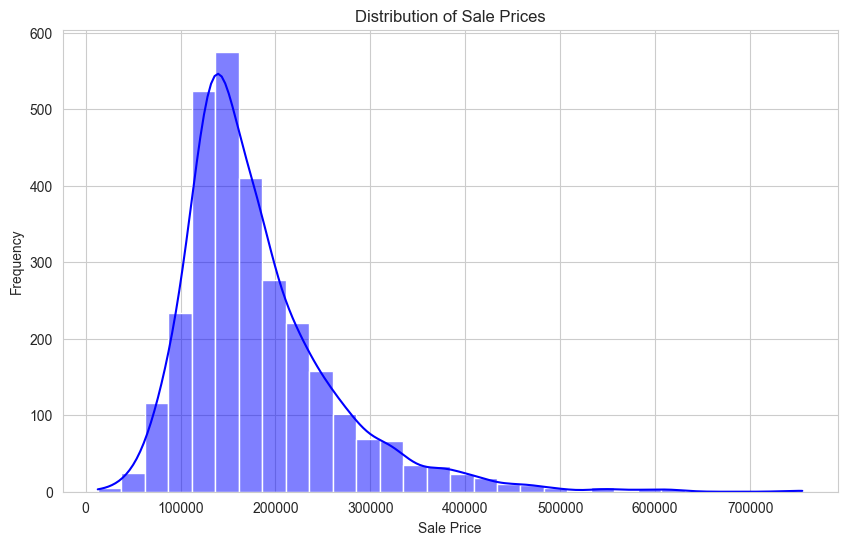

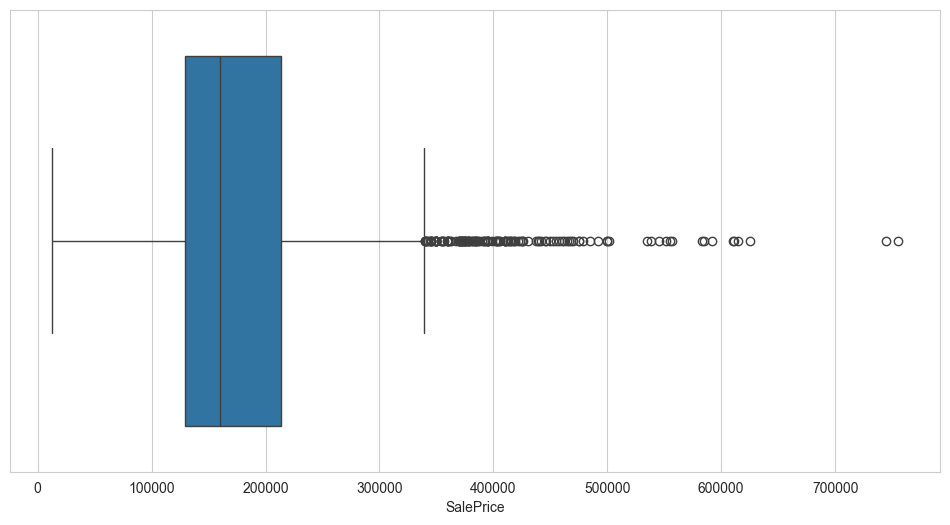

Number of outliers: 137
Target var = SalePrice


In [8]:
target_var='SalePrice'
transform=False
df_orig['SalePrice'].isnull().any()
df_orig['SalePrice'].describe()
# Here we see the SalePrice descriptive statistics. 
# The mean is greater than the median which can indicate a positive or 
# right skewededness. We can confirm this by visualizing the data.
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Distribution of Sale Prices
plt.figure(figsize=(10, 6))
sns.histplot(df_orig['SalePrice'], kde=True, bins=30, color='blue')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def show_outliers(df):
    '''
    Insights from Boxplots on SalePrice Outliers

    The boxplot of SalePrice revealed the following insights about outliers:

        Presence of High-Value Outliers

            There are several high-end properties with significantly higher prices than the majority of homes.

            These luxury homes may have unique features (e.g., larger lot size, premium locations, high-quality materials) that make them different from the typical market.

            If these outliers are not removed or transformed, they could impact model performance by skewing predictions.

        Lower-End Outliers Are Less Frequent

            There are fewer extreme low-end home prices compared to the high-end outliers.

            The minimum home prices seem closer to the majority of the dataset, suggesting that extremely low-value properties are not as unusual.

        Distribution is Right-Skewed

            The boxplot confirms right-skewness, meaning most homes are in the lower price range, while a smaller number of high-end properties pull the distribution to the right.

            A log transformation on SalePrice might be useful to normalize the data.

        Possible Need for Outlier Handling

            If extreme outliers do not represent typical homes, removing them could help model generalization.'
    '''
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df["SalePrice"])
    plt.show()


    Q1 = df["SalePrice"].quantile(0.25)
    Q3 = df["SalePrice"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df["SalePrice"] < lower_bound) | (df["SalePrice"] > upper_bound)]
    print(f"Number of outliers: {len(outliers)}")

def transform_sale_price(target_var,orig_target_var):
    """
    Apply log transformation to the SalePrice column.

    Args:
        df (pandas.DataFrame): The input DataFrame.

    Returns:
        pandas.DataFrame: The DataFrame with the log-transformed SalePrice column.
    Why Use Log-Transformed SalePrice as the Target?

        Reduces Skewness:

            The original SalePrice is right-skewed, meaning that some very expensive houses disproportionately affect the model.

            The log transformation normalizes the distribution, making it closer to a normal (Gaussian) distribution, which many models assume.

        Improves Model Performance:

            Linear regression and tree-based models often perform better with log-transformed targets because they handle proportional relationships rather than absolute differences.

        Prevents Overfitting:

            Without transformation, models might overly focus on extreme high values, causing instability.

            Log transformation ensures that percentage differences matter more than absolute differences.

    """
    # Apply log transformation

    # Apply log transformation
    log_Sale_price="Log_SalePrice"
    df_orig[target_var] = np.log1p(df_orig[orig_target_var])

    # Compare distributions before and after transformation
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Original SalePrice Distribution
    sns.histplot(df_orig[target_var], bins=30, kde=True, ax=axes[0])
    axes[0].set_title("Original SalePrice Distribution")

    # Log Transformed SalePrice Distribution
    sns.histplot(df_orig[target_var], bins=30, kde=True, ax=axes[1], color="orange")
    axes[1].set_title("Log Transformed SalePrice Distribution")

    plt.show()

    return df_orig
show_outliers(df_orig)
if transform:
    orig_target_var=target_var
    target_var='Log_SalePrice'
    df_orig=transform_sale_price(target_var,orig_target_var)
print(f'Target var = {target_var}')

*House prices by neighborhood*



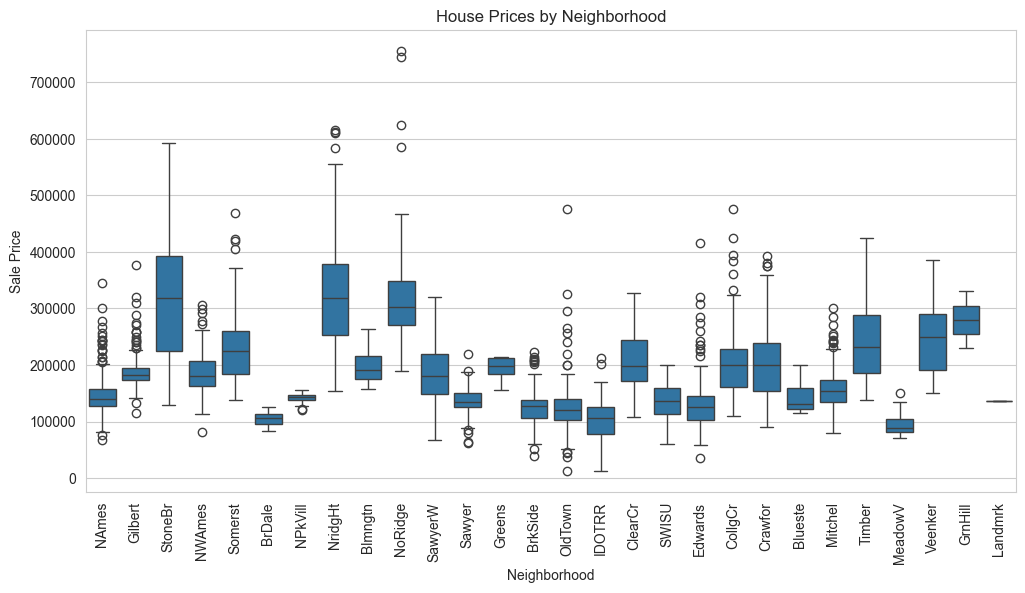

In [9]:
# Boxplot of SalePrice by Neighborhood
plt.figure(figsize=(12, 6))
sns.boxplot(x="Neighborhood", y="SalePrice", data=df_orig)
plt.xticks(rotation=90)  # Rotate labels for readability
plt.title("House Prices by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Sale Price")
plt.show()



*Correlation heatmap for numeric features*

Analyzing Correlation with SalePrice

In this step, we analyze the correlation between SalePrice and all other features. 
First, we visualize the full correlation matrix using a heatmap to identify strong relationships between features.
Next, we calculate and sort the correlation of each feature with SalePrice to identify 
which features have the most influence on the target variable. This analysis helps in selecting the most 
important features for the regression model.

We can optionally drop values with low correlation values.

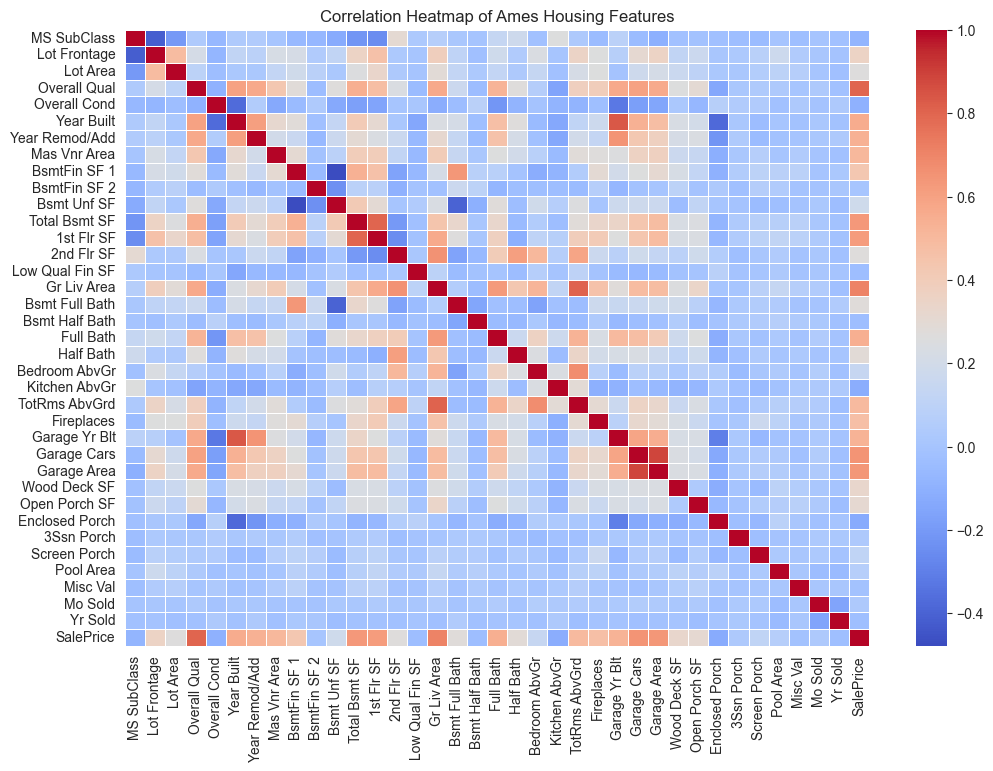

Correlation of features with 'SalePrice':
SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Enclosed Porch     0.128787
Kitchen AbvGr      0.119814
Screen Porch       0.112151
Overall Cond       0.101697
MS SubClass        0.085092
Pool Area          0.068403
Low Qual Fin SF    0.037660
Bsmt Half Bath     0.035835
Mo Sold            0.035259
3Ssn Porch         0.032225
Yr Sol

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_orig.corr(numeric_only=True), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Ames Housing Features")
plt.show()

matrix = np.abs(df_orig[numerical_df].corr())
correlation_to_saleprice = matrix['SalePrice'].sort_values(ascending=False)
print("Correlation of features with 'SalePrice':")
print(correlation_to_saleprice)


def do_drop(drop_list):
    train_df = train_df.drop(columns=[col for col in drop_list if col in train_df.columns], axis=1)
    train_df

    # Show only rows that contain NaN values
    train_df[train_df.isnull().any(axis=1)]


correlation_threshold = 0.1
would_drop_list = correlation_to_saleprice[correlation_to_saleprice < correlation_threshold].index.tolist()
print(f'Would drop list ={would_drop_list}')
drop=False
if drop:
    do_drop(would_drop_list)


*Define feature groups*

I've gone to https://jse.amstat.org/v19n3/decock/DataDocumentation.txt and used a list of location related variables to generate a list of property related variables.

In [12]:
import sys
# Created Manually
all_location_variables=['MS Zoning',
                    'Neighborhood',
                    'Condition 1',
                    'Condition 2',
                    'Lot Frontage',
                    'Street',
                    'Alley',
                    'Lot Shape',
                    'Land Contour',
                    'Lot Config',
                    'Land Slope',
                    'Utilities'
                    ]

# important_location_variables=['MSZoning',
#                     'Neighborhood',
#                     'Condition1',
#                     'Condition2',
#                     'Utilities'
#                     ]


# Get a list of all columns in the dataset
column_list = df_orig.columns.tolist()

def check_is_sublist(list1, list2):
    errors=[]
    for i in list1:
        if i not in list2:
            errors.append(i)
    if errors:
        print("The following variables are not in list2: ",errors)
        sys.exit(1)

check_is_sublist(all_location_variables,column_list)

def create_list_of_property_variables():
    property_variables=[]
    for c in column_list:
        if c not in all_location_variables:
            property_variables.append(c)
    return property_variables

property_variables=create_list_of_property_variables()

print("Property Variables: ", property_variables)
print("Location Variables: ", all_location_variables)

Property Variables:  ['MS SubClass', 'Lot Area', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC', 'Fence', 'Misc Feature', 'Misc Val', 'Mo Sold', 'Yr Sold', 'Sale 

Handle missing values etc

- For columns with numeric values ​​- fill empty values ​​with the column mean.
- For columns with categorical values ​​- we will fill empty values ​​with the most common value in the column

Common Thresholds

- Above 60-70% missing: Consider dropping unless the column is critical.
- 30-60% missing: Consider imputing if the feature is valuable.
- Below 30% missing: Usually worth imputing rather than dropping.

In this case
- 'Pool QC' (99.6%), 'Misc Feature' (96.4%), 'Alley' (93.2%), and 'Fence' (80.5%) → Likely not useful and can be dropped.- 
- 'Fireplace Qu' (48.6%) → Might be worth imputing if fireplaces impact home values.

In [13]:
# Identify missing values
missing_values = df_orig.isnull().sum()
count_missing=len(np.where(df_orig.isnull())[0])
print(f'There are {count_missing} empty values in the dataframe.')
# Filter only columns with missing values
missing_values = missing_values[missing_values > 0]

# Create a DataFrame with missing count and percentage
missing_values_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': (missing_values.values / len(df_orig)) * 100
})

# Sort by highest missing percentage
missing_values_df = missing_values_df.sort_values(by='Missing Percentage', ascending=False)

# Display the result
print(missing_values_df)

rows, cols = df_orig.shape
print(f"Rows: {rows}, Columns: {cols}")

There are 15749 empty values in the dataframe.
            Column  Missing Count  Missing Percentage
24         Pool QC           2917           99.556314
26    Misc Feature           2824           96.382253
1            Alley           2732           93.242321
25           Fence           2358           80.477816
2     Mas Vnr Type           1775           60.580205
16    Fireplace Qu           1422           48.532423
0     Lot Frontage            490           16.723549
23     Garage Cond            159            5.426621
22     Garage Qual            159            5.426621
19   Garage Finish            159            5.426621
18   Garage Yr Blt            159            5.426621
17     Garage Type            157            5.358362
6    Bsmt Exposure             83            2.832765
9   BsmtFin Type 2             81            2.764505
5        Bsmt Cond             80            2.730375
4        Bsmt Qual             80            2.730375
7   BsmtFin Type 1             80  

In [14]:

def do_drop(df):
    threshold = 0.80  # 80%
    cols_to_drop = missing_values_df[missing_values_df['Missing Percentage'] > (threshold * 100)]['Column'].tolist()
    print(f"Columns to drop: {cols_to_drop}")
    df_cleaned = df.drop(columns=cols_to_drop)
    return df_cleaned

def do_impute(df):
    # Impute missing values
    for col in df.columns:
        if df[col].dtype == 'object':  # Categorical columns
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:  # Numeric columns
            df[col].fillna(df[col].mean(), inplace=True)
    return df
df=df_orig



drop=False
df=df_orig
if drop:
    df=do_drop(df)
df_cleaned=do_impute(df)


# Identify missing values
missing_values = df_cleaned.isnull().sum()
count_missing=len(np.where(df_orig.isnull())[0])
print(f'There are {count_missing} empty values in the dataframe.')
rows, cols = df_cleaned.shape
print(f"Rows: {rows}, Columns: {cols}")
# RETURN DF_CLEANED

There are 0 empty values in the dataframe.
Rows: 2930, Columns: 80


/var/folders/r1/hp5_t9m54pjfz3ymsmkxcltc0000gp/T/ipykernel_97540/411754907.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/var/folders/r1/hp5_t9m54pjfz3ymsmkxcltc0000gp/T/ipykernel_97540/411754907.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

K-Means Clustering + Random Forest with Evaluation

RMSE: 12818.95
R² Score: 0.9742


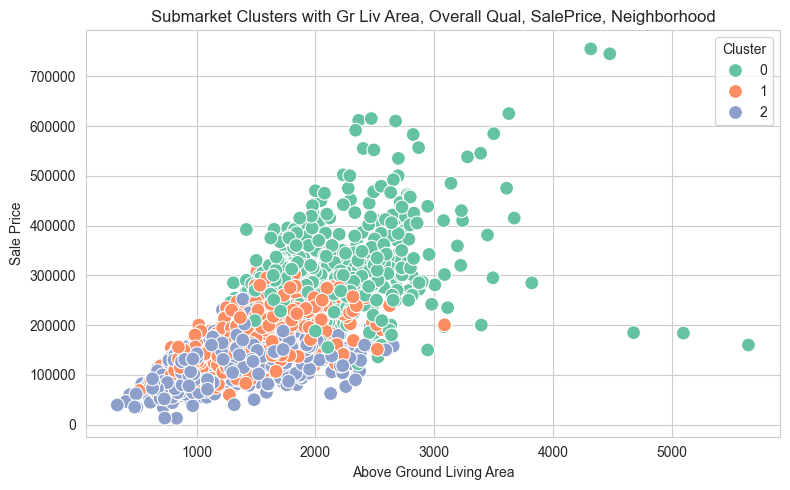

In [19]:
# Imports
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your Ames dataset (replace with actual path if needed)
# df = pd.read_csv("AmesHousing.csv")

# Simulated dataset example (replace with your full dataset)
df = df_cleaned

# Encode neighborhood as numeric
df['Neighborhood_Code'] = df['Neighborhood'].astype('category').cat.codes

# Select clustering features
features = df[['Gr Liv Area', 'Overall Qual', 'SalePrice', 'Neighborhood_Code']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Apply KMeans clustering
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['SubmarketCluster'] = kmeans.fit_predict(X_scaled)

# Train a Random Forest model with SubmarketCluster
X_model = df[['Gr Liv Area', 'Overall Qual', 'Neighborhood_Code', 'SubmarketCluster']]
y_model = df['SalePrice']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_model, y_model)
y_pred = model.predict(X_model)

# Evaluate performance
rmse = np.sqrt(mean_squared_error(y_model, y_pred))
r2 = r2_score(y_model, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


# Visualize clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Gr Liv Area', y='SalePrice', hue='SubmarketCluster', palette='Set2', s=100)
plt.title('Submarket Clusters with Gr Liv Area, Overall Qual, SalePrice, Neighborhood')
plt.xlabel('Above Ground Living Area')
plt.ylabel('Sale Price')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()



xes:

    X-axis: GrLivArea (Above Ground Living Area)

    Y-axis: SalePrice (House Sale Price)

What the plot shows:

    You've used K-Means clustering on features including GrLivArea, OverallQual, SalePrice, and Neighborhood_Code.

    Each point is a home, color-coded by its SubmarketCluster label (Clusters 0, 1, and 2).


1. Clusters reflect different market segments

    Cluster 2 (blue): Concentrated in lower living area and lower price → likely smaller, more affordable homes.

    Cluster 1 (orange): A middle group, bridging lower and mid-tier homes.

    Cluster 0 (green): Covers larger and more expensive homes, stretching into luxury pricing.

2. There is price-size stratification

    Your clustering appears to effectively group homes along a price-size gradient, even though price wasn’t used directly for clustering. This is good—it shows meaningful patterns.

3. Data-driven submarkets

    These clusters act as data-driven "submarkets", which could be more precise than administrative labels like Neighborhood.

 98%|===================| 2877/2930 [00:51<00:00]        

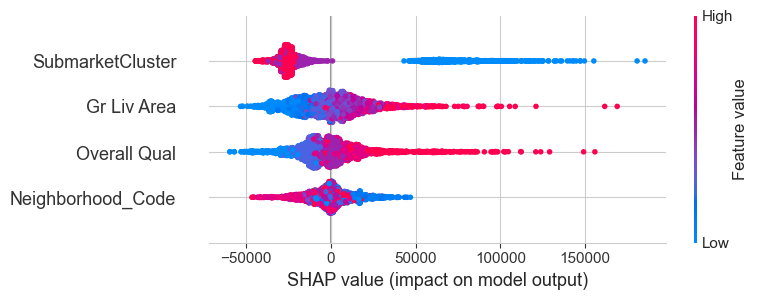

In [20]:
# 1. Import SHAP
import shap

# 2. Create the SHAP explainer using your trained model and input data
explainer = shap.Explainer(model, X_model)

# 3. Generate SHAP values
shap_values = explainer(X_model)

# 4. SHAP Summary Plot (shows overall feature importance)
shap.summary_plot(shap_values, X_model)
